# TFG : “Comparativa de Modelos de Predicción de Mantenimiento Predictivo y Exploración de datos de Motores Turbofán de la Nasa.”
#### Daniel Losada Rueda

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model



In [111]:
#se carga el conjunto train
datos_entrenamiento = pd.read_csv("train_FD001.txt", sep='\s+', header=None)

#número de filas y columnas
datos_entrenamiento.shape


(20631, 26)

In [113]:
#primer vistazo
datos_entrenamiento.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [114]:
#cuantos motores hay en este dataset
motores_unicos = np.unique(datos_entrenamiento[0])
print(motores_unicos)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]


In [116]:
#cuantos ciclos tiene cada uno de esos motores
ciclos_hasta_fallo = datos_entrenamiento.groupby(0)[1].count()
print("Ciclos totales por motor en conjunto TRAIN:" )
print(ciclos_hasta_fallo.values)

Ciclos totales por motor en conjunto TRAIN:
[192 287 179 189 269 188 259 150 201 222 240 170 163 180 207 209 276 195
 158 234 195 202 168 147 230 199 156 165 163 194 234 191 200 195 181 158
 170 194 128 188 216 196 207 192 158 256 214 231 215 198 213 213 195 257
 193 275 137 147 231 172 185 180 174 283 153 202 313 199 362 137 208 213
 213 166 229 210 154 231 199 185 240 214 293 267 188 278 178 213 217 154
 135 341 155 258 283 336 202 156 185 200]


PRUEBA

In [117]:
#se cargan los datos de prueba
datos_prueba = pd.read_csv("test_FD001.txt", sep='\s+', header=None)

ciclos_totales_test = datos_prueba.groupby(0)[1].count().values
print("Ciclos totales por motor en conjunto TEST:" )
print(ciclos_totales_test)


Ciclos totales por motor en conjunto TEST:
[ 31  49 126 106  98 105 160 166  55 192  83 217 195  46  76 113 165 133
 135 184 148  39 130 186  48  76 140 158 171 143 196 145  50 203 198 126
 121 125  37 133 123 156 172  54 152 146  73  78 303  74 144 189 164 121
 113 136 160 176  94 147 159 232 155 168  71 147  71 187  54 152  68 131
 112 137  88 205 162  72 101 133 213 162  73 172  34 110  56  68 177 146
 234 150 244 133  89  97 134 121  97 198]


RUL

In [118]:
#se cargan los datos de RUL
rul_real = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None)
print(rul_real[0].values)

[112  98  69  82  91  93  91  95 111  96  97 124  95 107  83  84  50  28
  87  16  57 111 113  20 145 119  66  97  90 115   8  48 106   7  11  19
  21  50 142  28  18  10  59 109 114  47 135  92  21  79 114  29  26  97
 137  15 103  37 114 100  21  54  72  28 128  14  77   8 121  94 118  50
 131 126 113  10  34 107  63  90   8   9 137  58 118  89 116 115 136  28
  38  20  85  55 128 137  82  59 117  20]


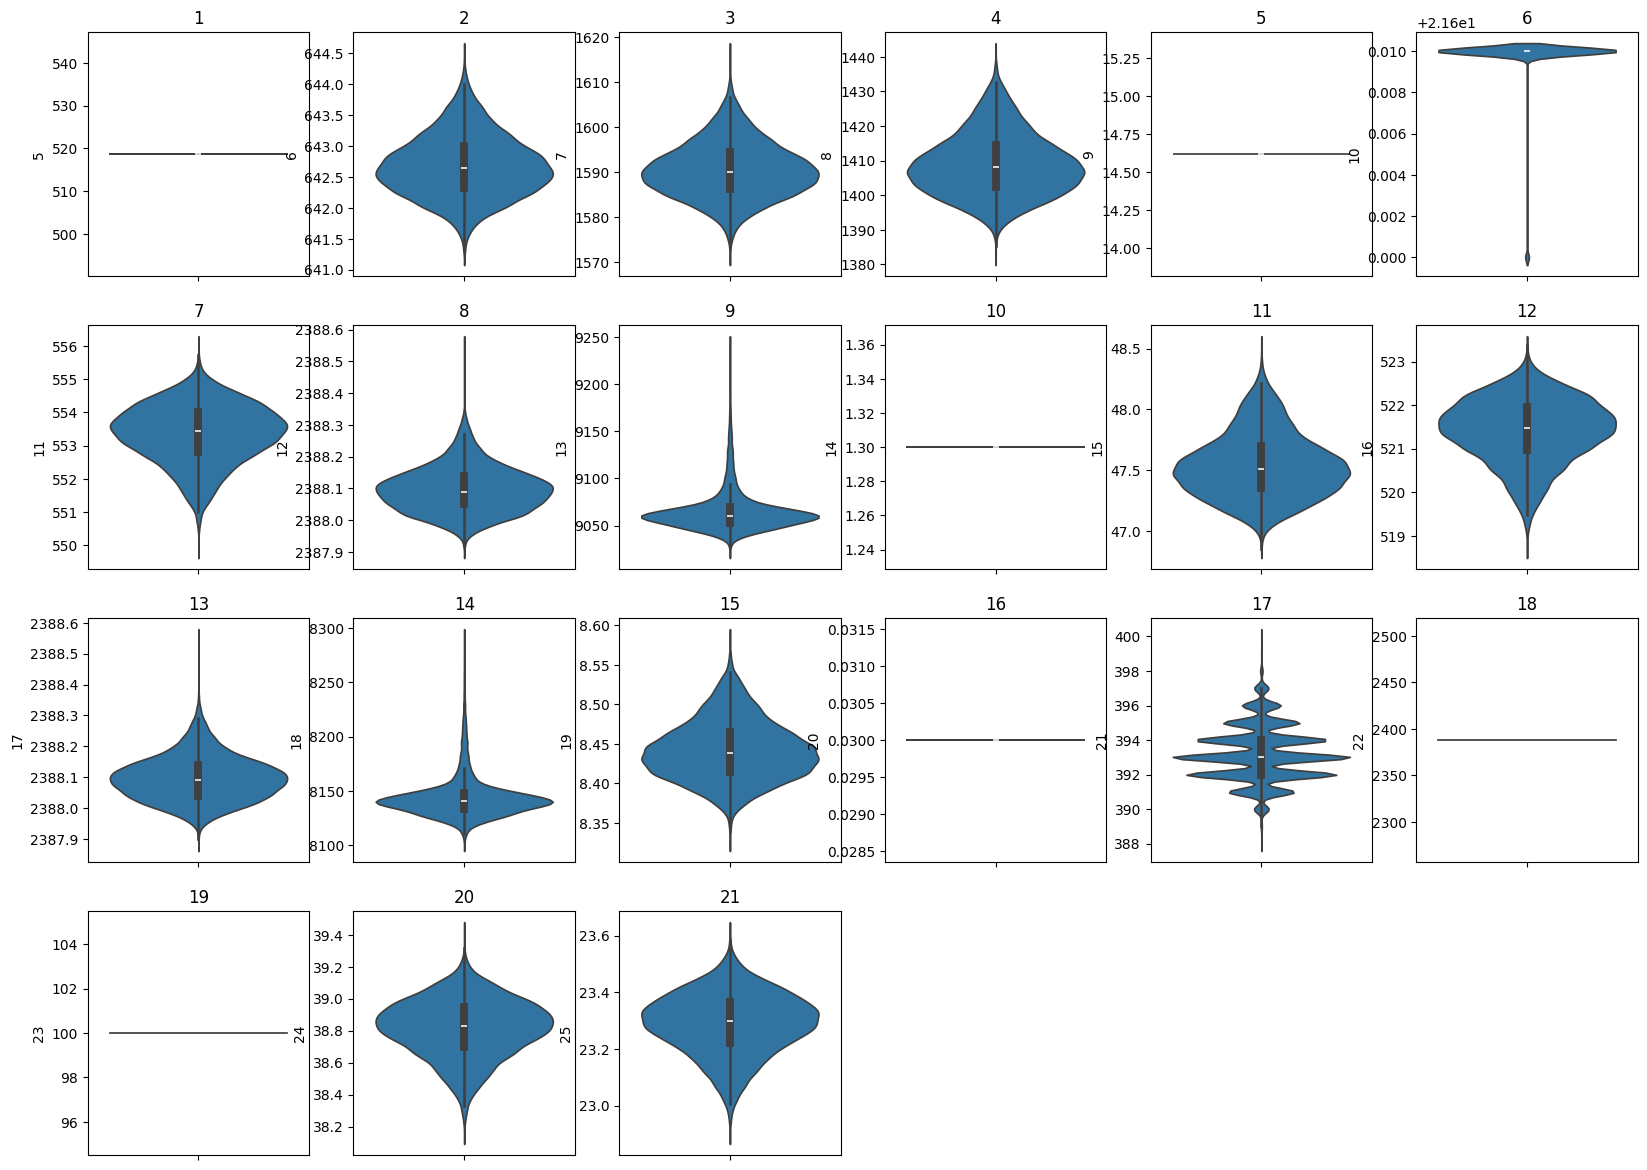

In [119]:
#se ven las características
plt.figure(figsize=(20, 26))

for i in np.arange(5, 26): 
    temp = datos_entrenamiento.iloc[:, i]
    plt.subplot(7, 6, i-4)
    sns.violinplot(data=temp, inner="box")
    plt.title("" + str(i-4))
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

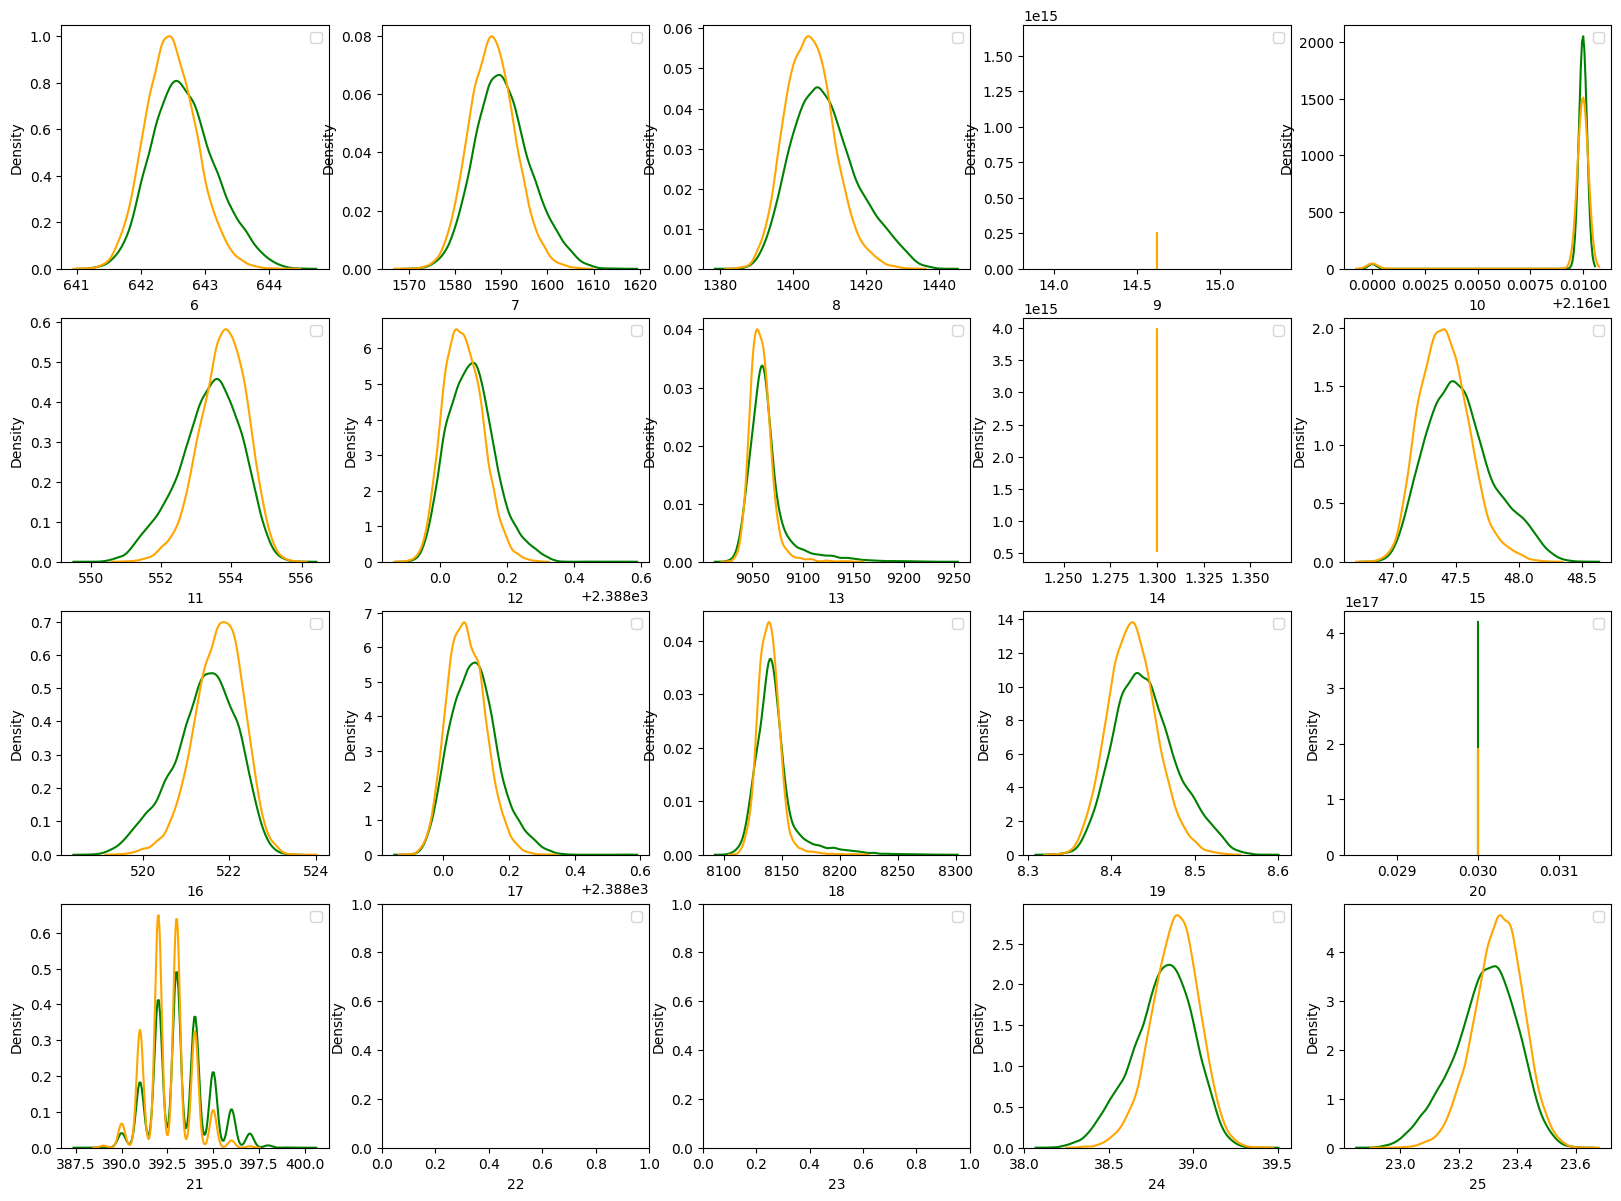

In [120]:
#distribuciones
plt.figure(figsize=(20, 26))
for i, j in enumerate([6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]):
    datos_entrenamiento_temp = datos_entrenamiento.iloc[:, j]
    datos_prueba_temp = datos_prueba.iloc[:, j]
    plt.subplot(7, 5, i+1)
    sns.kdeplot(datos_entrenamiento_temp, legend=False, color="green")
    sns.kdeplot(datos_prueba_temp, legend=False, color="orange")
    plt.legend()
plt.show()


PREPARACIÓN DE VENTANAS PARA EL TRAINING

In [127]:
def procesar_datos_de_entrada_con_objetivos(datos_entrada, datos_objetivo=None, longitud_ventana=1, desplazamiento=1):
    num_lotes = int(np.floor((len(datos_entrada) - longitud_ventana)/desplazamiento)) + 1
    num_caracteristicas = datos_entrada.shape[1]
    datos_salida = np.repeat(np.nan, repeats=num_lotes * longitud_ventana * num_caracteristicas).reshape(num_lotes, longitud_ventana, num_caracteristicas)
    
    if datos_objetivo is None:
        for lote in range(num_lotes):
            datos_salida[lote, :, :] = datos_entrada[(0 + desplazamiento * lote):(0 + desplazamiento * lote + longitud_ventana), :]
        return datos_salida
    
    
    else:
        objetivos_salida = np.repeat(np.nan, repeats=num_lotes)
        for lote in range(num_lotes):
            datos_salida[lote, :, :] = datos_entrada[(0 + desplazamiento * lote):(0 + desplazamiento * lote + longitud_ventana), :]
            objetivos_salida[lote] = datos_objetivo[(desplazamiento * lote + (longitud_ventana - 1))]
        return datos_salida, objetivos_salida


In [126]:
def procesar_datos_de_prueba(datos_prueba_motor, longitud_ventana, desplazamiento, num_ventanas_prueba=1):
    max_num_lotes_prueba = int(np.floor((len(datos_prueba_motor) - longitud_ventana) / desplazamiento)) + 1
    if max_num_lotes_prueba < num_ventanas_prueba:
        longitud_requerida = (max_num_lotes_prueba - 1) * desplazamiento + longitud_ventana
        datos_prueba_motor_lote = procesar_datos_de_entrada_con_objetivos(
            datos_prueba_motor[-longitud_requerida:, :],
            datos_objetivo=None,
            longitud_ventana=longitud_ventana,
            desplazamiento=desplazamiento
        )
        num_ventanas_prueba_extraidas = max_num_lotes_prueba
        return datos_prueba_motor_lote, num_ventanas_prueba_extraidas
    
    
    else:
        longitud_requerida = (num_ventanas_prueba - 1) * desplazamiento + longitud_ventana
        datos_prueba_motor_lote = procesar_datos_de_entrada_con_objetivos(
            datos_prueba_motor[-longitud_requerida:, :],
            datos_objetivo=None,
            longitud_ventana=longitud_ventana,
            desplazamiento=desplazamiento
        )
        num_ventanas_prueba_extraidas = num_ventanas_prueba
        return datos_prueba_motor_lote, num_ventanas_prueba_extraidas


In [125]:
def procesar_objetivos(longitud_datos, rul_inicial=None):
    if rul_inicial is None:
        return np.arange(longitud_datos - 1, -1, -1)
    
    
    else:
        duracion_rul_inicial = longitud_datos - rul_inicial
        if duracion_rul_inicial <= 0:  # Esta condición es necesaria cuando el rul inicial es mayor que la longitud de datos de un motor
            arreglo_objetivo = np.arange(longitud_datos - 1, -1, -1)
            return arreglo_objetivo
        else:
            arreglo_objetivo = np.append(rul_inicial * np.ones(shape=(duracion_rul_inicial,)), np.arange(rul_inicial - 1, -1, -1))
            return arreglo_objetivo


In [128]:
from sklearn.preprocessing import MinMaxScaler
longitud_ventana = 30
desplazamiento = 1
rul_inicial = None
datos_entrenamiento_procesados = []
objetivos_entrenamiento_procesados = []
num_ventanas_prueba = 1  



datos_prueba_procesados = []
lista_num_ventanas_prueba = []  

num_motores = np.min([len(datos_entrenamiento[0].unique()), len(datos_prueba[0].unique())])

for i in np.arange(1, num_motores + 1):
    
    datos_entrenamiento_temp = datos_entrenamiento[datos_entrenamiento[0] == i].drop(columns=[0, 1, 2, 3, 4, 5, 9, 10, 14, 20, 22, 23]).values
    datos_prueba_temp = datos_prueba[datos_prueba[0] == i].drop(columns=[0, 1, 2, 3, 4, 5, 9, 10, 14, 20, 22, 23]).values
    
    if (len(datos_prueba_temp) < longitud_ventana):
        print("El motor de prueba {} no tiene suficientes datos para una longitud de ventana de {}".format(i, longitud_ventana))
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intente disminuir la longitud de la ventana.")
    elif (len(datos_entrenamiento_temp) < longitud_ventana):
        print("El motor de entrenamiento {} no tiene suficientes datos para una longitud de ventana de {}".format(i, longitud_ventana))
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intente disminuir la longitud de la ventana.")
    
    escalador = MinMaxScaler(feature_range=(-1, 1))
    datos_entrenamiento_temp = escalador.fit_transform(datos_entrenamiento_temp)
    datos_prueba_temp = escalador.transform(datos_prueba_temp)    
    
    objetivos_entrenamiento_temp = procesar_objetivos(longitud_datos=datos_entrenamiento_temp.shape[0], rul_inicial=rul_inicial)
    datos_para_un_motor, objetivos_para_un_motor = procesar_datos_de_entrada_con_objetivos(datos_entrenamiento_temp, objetivos_entrenamiento_temp, 
                                                                                          longitud_ventana=longitud_ventana, desplazamiento=desplazamiento)
    
    #prueba
    datos_prueba_para_un_motor, num_ventanas = procesar_datos_de_prueba(datos_prueba_temp, longitud_ventana=longitud_ventana, 
                                                                        desplazamiento=desplazamiento, num_ventanas_prueba=num_ventanas_prueba)
    
    datos_entrenamiento_procesados.append(datos_para_un_motor)
    objetivos_entrenamiento_procesados.append(objetivos_para_un_motor)
    
    datos_prueba_procesados.append(datos_prueba_para_un_motor)
    lista_num_ventanas_prueba.append(num_ventanas)

datos_entrenamiento_procesados = np.concatenate(datos_entrenamiento_procesados)
objetivos_entrenamiento_procesados = np.concatenate(objetivos_entrenamiento_procesados)
datos_prueba_procesados = np.concatenate(datos_prueba_procesados)
rul_real = rul_real[0].values

indice = np.random.permutation(len(objetivos_entrenamiento_procesados))
datos_entrenamiento_procesados, objetivos_entrenamiento_procesados = datos_entrenamiento_procesados[indice], objetivos_entrenamiento_procesados[indice]


HASTA AQUI PROCESAMIENTO

-----------------------------------------------------------------------------------------------------------------------------------------------------------------

# SVR

In [132]:
# Carga inicial de datos
datos_entrenamiento = pd.read_csv("train_FD001.txt", sep="\s+", header=None)
datos_prueba = pd.read_csv("test_FD001.txt", sep="\s+", header=None)
rul_verdadero = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None)

# Parámetros
longitud_ventana = 1
desplazamiento = 1
rul_inicial = 125
datos_entrenamiento_procesados = []
objetivos_entrenamiento_procesados = []
num_ventanas_prueba = 5
datos_prueba_procesados = []
lista_num_ventanas_prueba = []

# Eliminación de columnas sin información
columnas_a_eliminar = [0,1,2,3,4,5,9,10,14,20,22,23]
primera_columna_entrenamiento = datos_entrenamiento[0]
primera_columna_prueba = datos_prueba[0]
escalador = StandardScaler()
datos_entrenamiento_escalados = escalador.fit_transform(datos_entrenamiento.drop(columns=columnas_a_eliminar))
datos_prueba_escalados = escalador.transform(datos_prueba.drop(columns=columnas_a_eliminar))

datos_entrenamiento = pd.DataFrame(data=np.c_[primera_columna_entrenamiento, datos_entrenamiento_escalados])
datos_prueba = pd.DataFrame(data=np.c_[primera_columna_prueba, datos_prueba_escalados])

num_motores_entrenamiento = len(datos_entrenamiento[0].unique())
num_motores_prueba = len(datos_prueba[0].unique())

# Entrenamiento
for i in np.arange(1, num_motores_entrenamiento + 1):
    temp_datos_entrenamiento = datos_entrenamiento[datos_entrenamiento[0] == i].drop(columns=[0]).values
    if len(temp_datos_entrenamiento) < longitud_ventana:
        print(f"El motor de entrenamiento {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
    
    temp_objetivos_entrenamiento = procesar_objetivos(longitud_datos=temp_datos_entrenamiento.shape[0], rul_inicial=rul_inicial)
    datos_para_un_motor, objetivos_para_un_motor = procesar_datos_de_entrada_con_objetivos(temp_datos_entrenamiento, temp_objetivos_entrenamiento, 
                                                                                           longitud_ventana=longitud_ventana, desplazamiento=desplazamiento)
    datos_entrenamiento_procesados.append(datos_para_un_motor)
    objetivos_entrenamiento_procesados.append(objetivos_para_un_motor)
datos_entrenamiento_procesados = np.concatenate(datos_entrenamiento_procesados)
objetivos_entrenamiento_procesados = np.concatenate(objetivos_entrenamiento_procesados)

# Prueba
for i in np.arange(1, num_motores_prueba + 1):
    temp_datos_prueba = datos_prueba[datos_prueba[0] == i].drop(columns=[0]).values
    if len(temp_datos_prueba) < longitud_ventana:
        print(f"El motor de prueba {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
    
    datos_prueba_para_un_motor, num_ventanas = procesar_datos_de_prueba(temp_datos_prueba, longitud_ventana=longitud_ventana, desplazamiento=desplazamiento,
                                                                        num_ventanas_prueba=num_ventanas_prueba)
    datos_prueba_procesados.append(datos_prueba_para_un_motor)
    lista_num_ventanas_prueba.append(num_ventanas)

datos_prueba_procesados = np.concatenate(datos_prueba_procesados)
rul_verdadero = rul_verdadero[0].values
indice = np.random.permutation(len(objetivos_entrenamiento_procesados))
datos_entrenamiento_procesados, objetivos_entrenamiento_procesados = datos_entrenamiento_procesados[indice], objetivos_entrenamiento_procesados[indice]

print("Forma de los datos de entrenamiento procesados: ", datos_entrenamiento_procesados.shape)
print("Forma de los RUL de entrenamiento procesados: ", objetivos_entrenamiento_procesados.shape)
print("Forma de los datos de prueba procesados: ", datos_prueba_procesados.shape)
print("Forma de los RUL verdaderos: ", rul_verdadero.shape)
datos_entrenamiento_procesados = datos_entrenamiento_procesados.reshape(-1, datos_entrenamiento_procesados.shape[2])
datos_prueba_procesados = datos_prueba_procesados.reshape(-1, datos_prueba_procesados.shape[2])


Forma de los datos de entrenamiento procesados:  (20631, 1, 14)
Forma de los RUL de entrenamiento procesados:  (20631,)
Forma de los datos de prueba procesados:  (500, 1, 14)
Forma de los RUL verdaderos:  (100,)


In [135]:
#gridsearch
parametros = {"C": [1, 10, 50, 100],
              'epsilon': [1, 5, 10, 50],
              'kernel': ["rbf"]}

#validacion
svm_reg_ajustado = GridSearchCV(SVR(), parametros, n_jobs=-1, cv=10)
svm_reg_ajustado.fit(datos_entrenamiento_procesados, objetivos_entrenamiento_procesados)


GridSearchCV(cv=10, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100], 'epsilon': [1, 5, 10, 50],
                         'kernel': ['rbf']})

In [137]:
mejores_parametros = svm_reg_ajustado.best_params_
print(mejores_parametros)

{'C': 10, 'epsilon': 10, 'kernel': 'rbf'}


In [138]:
mejor_modelo_reg = svm_reg_ajustado.best_estimator_
mejor_modelo_reg

SVR(C=10, epsilon=10)

In [139]:

pred_rul = mejor_modelo_reg.predict(datos_prueba_procesados)
preds_por_maquina = np.split(pred_rul, np.cumsum(lista_num_ventanas_prueba)[:-1])
media_pred_por_maquina = [np.average(ruls_por_maquina, weights=np.repeat(1/num_ventanas, num_ventanas)) 
                          for ruls_por_maquina, num_ventanas in zip(preds_por_maquina, lista_num_ventanas_prueba)]

# Cálculo de métricas
rmse_ajustado = np.sqrt(mean_squared_error(rul_verdadero, media_pred_por_maquina))
mae_ajustado = mean_absolute_error(rul_verdadero, media_pred_por_maquina)
print("RMSE (SVR): ", rmse_ajustado)
print("MAE (SVR): ", mae_ajustado)

RMSE (SVR):  19.738187590475583
MAE (SVR):  14.783504843650498


In [140]:

def compute_s_score(rul_true, rul_pred):
    diff = rul_pred - rul_true
    return np.sum(np.where(diff < 0, np.exp(-diff/13)-1, np.exp(diff/10)-1))

In [57]:
s_score = compute_s_score(rul_verdadero, media_pred_por_maquina)
print("S-score: ", s_score)

S-score:  1350.6574511428255


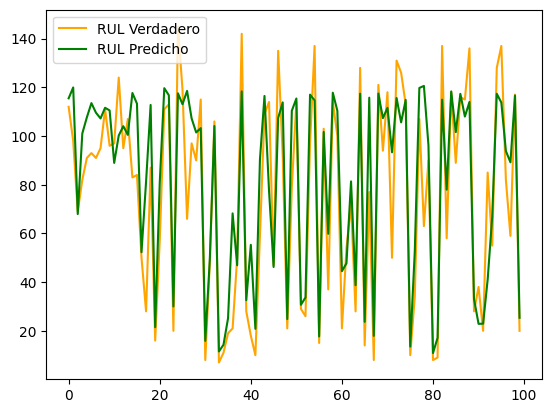

In [141]:
# Plot true and predicted RUL values
plt.plot(rul_verdadero, label="RUL Verdadero", color="orange")
plt.plot(media_pred_por_maquina, label="RUL Predicho", color="green")
plt.legend()
plt.show()

# Random Forest

In [169]:
#carga
datos_entrenamiento = pd.read_csv("train_FD001.txt", sep="\s+", header=None)
datos_prueba = pd.read_csv("test_FD001.txt", sep="\s+", header=None)
rul_verdadero = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None)

longitud_ventana = 1
desplazamiento = 1
rul_inicial = 125            
datos_entrenamiento_procesados = []
objetivos_entrenamiento_procesados = []
num_ventanas_prueba = 5     
datos_prueba_procesados = []
lista_num_ventanas_prueba = []
columnas_a_eliminar = [0, 1, 2, 3, 4, 5, 9, 10, 14, 20, 22, 23]
num_maquinas = np.min([len(datos_entrenamiento[0].unique()), len(datos_prueba[0].unique())])

for i in np.arange(1, num_maquinas + 1):
    temp_datos_entrenamiento = datos_entrenamiento[datos_entrenamiento[0] == i].drop(columns=columnas_a_eliminar).values
    temp_datos_prueba = datos_prueba[datos_prueba[0] == i].drop(columns=columnas_a_eliminar).values
    
    if (len(temp_datos_prueba) < longitud_ventana):
        print(f"El motor de prueba {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
    elif (len(temp_datos_entrenamiento) < longitud_ventana):
        print(f"El motor de entrenamiento {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
    
    temp_objetivos_entrenamiento = procesar_objetivos(longitud_datos=temp_datos_entrenamiento.shape[0], rul_inicial=rul_inicial)
    datos_para_una_maquina, objetivos_para_una_maquina = procesar_datos_de_entrada_con_objetivos(temp_datos_entrenamiento, temp_objetivos_entrenamiento, 
                                                                                longitud_ventana=longitud_ventana, desplazamiento=desplazamiento)
    
    #prueba
    datos_prueba_para_una_maquina, num_ventanas = procesar_datos_de_prueba(temp_datos_prueba, longitud_ventana=longitud_ventana, desplazamiento=desplazamiento,
                                                             num_ventanas_prueba=num_ventanas_prueba)
    
    datos_entrenamiento_procesados.append(datos_para_una_maquina)
    objetivos_entrenamiento_procesados.append(objetivos_para_una_maquina)
    
    datos_prueba_procesados.append(datos_prueba_para_una_maquina)
    lista_num_ventanas_prueba.append(num_ventanas)

datos_entrenamiento_procesados = np.concatenate(datos_entrenamiento_procesados)
objetivos_entrenamiento_procesados = np.concatenate(objetivos_entrenamiento_procesados)
datos_prueba_procesados = np.concatenate(datos_prueba_procesados)
rul_verdadero = rul_verdadero[0].values

# Barajar los datos
indice = np.random.permutation(len(objetivos_entrenamiento_procesados))
datos_entrenamiento_procesados, objetivos_entrenamiento_procesados = datos_entrenamiento_procesados[indice], objetivos_entrenamiento_procesados[indice]

print("datos de entrenamiento ", datos_entrenamiento_procesados.shape)
print("datos de prueba ", datos_prueba_procesados.shape)
print("objetivos de entrenamiento ", objetivos_entrenamiento_procesados.shape)
print("RUL verdaderos: ", rul_verdadero.shape)


datos de entrenamiento  (20631, 1, 14)
datos de prueba  (500, 1, 14)
objetivos de entrenamiento  (20631,)
RUL verdaderos:  (100,)


In [170]:
# Ajustar la forma de los datos
datos_entrenamiento_procesados = datos_entrenamiento_procesados.reshape(-1, datos_entrenamiento_procesados.shape[2])
datos_prueba_procesados = datos_prueba_procesados.reshape(-1, datos_prueba_procesados.shape[2])

print("datos de entrenamiento procesados: ", datos_entrenamiento_procesados.shape)
print("datos de prueba procesados: ", datos_prueba_procesados.shape)

datos de entrenamiento procesados:  (20631, 14)
datos de prueba procesados:  (500, 14)


In [10]:

#param_grid = {"n_estimators": [100, 150, 200, 250, 300, 350],
              #"max_features": ["auto", "sqrt", "log2"]}
#grid = GridSearchCV(RandomForestRegressor(), param_grid = param_grid,scoring = "neg_root_mean_squared_error",
                    #n_jobs = -1, cv = 10)
#grid.fit(processed_train_data, processed_train_targets)

c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
52 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\danie\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.p

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 250, 300, 350]},
             scoring='neg_root_mean_squared_error')

In [92]:
rf_model = RandomForestRegressor(n_estimators= 150, max_features = "sqrt",
                                 n_jobs = -1, random_state = 32)
rf_model.fit(processed_train_data, processed_train_targets)
rul_pred = rf_model.predict(processed_test_data)

# First split predictions according to number of windows of each engine
preds_for_each_engine = np.split(rul_pred, np.cumsum(num_test_windows_list)[:-1])
mean_pred_for_each_engine = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows)) 
                             for ruls_for_each_engine, num_windows in zip(preds_for_each_engine, num_test_windows_list)]
RMSE = np.sqrt(mean_squared_error(true_rul, mean_pred_for_each_engine))
print("RMSE: ", RMSE)

RMSE:  19.015488485617897


In [171]:
modelo_rf = RandomForestRegressor(n_estimators=150, max_features="sqrt",
                                  n_jobs=-1)

modelo_rf.fit(processed_train_data, processed_train_targets)
predicciones_rul = modelo_rf.predict(processed_test_data)
predicciones_por_motor = np.split(predicciones_rul, np.cumsum(num_test_windows_list)[:-1])
promedio_predicciones_por_motor = [np.average(predicciones_para_motor, weights=np.repeat(1/num_ventanas, num_ventanas))
                                   for predicciones_para_motor, num_ventanas in zip(predicciones_por_motor, num_test_windows_list)]


error_rmse = np.sqrt(mean_squared_error(true_rul, promedio_predicciones_por_motor))
print("RMSE modelo: ", error_rmse)


RMSE modelo:  19.14170206666296


In [172]:

modelo_rf2 = RandomForestRegressor(n_estimators=350, max_features="sqrt", n_jobs=-1)


modelo_rf2.fit(datos_entrenamiento_procesados, objetivos_entrenamiento_procesados)
predicciones_rul = modelo_rf2.predict(datos_prueba_procesados)
predicciones_por_motor = np.split(predicciones_rul, np.cumsum(lista_num_ventanas_prueba)[:-1])

promedio_predicciones_por_motor = [np.average(predicciones_motor, weights=np.repeat(1/num_ventanas, num_ventanas)) 
                                   for predicciones_motor, num_ventanas in zip(predicciones_por_motor, lista_num_ventanas_prueba)]

error_rmse = np.sqrt(mean_squared_error(rul_verdadero, promedio_predicciones_por_motor))
print("RMSE modelo 2: ", error_rmse)


RMSE modelo 2:  19.098159741328644


In [180]:

rul_pred_tuned = rf_model.predict(datos_prueba_procesados)
preds_for_each_engine_tuned = np.split(rul_pred_tuned, np.cumsum(lista_num_ventanas_prueba)[:-1])
mean_pred_for_each_engine_tuned = [np.average(ruls_for_each_engine, weights = np.repeat(1/num_windows, num_windows)) 
                                   for ruls_for_each_engine, num_windows in zip(preds_for_each_engine_tuned,
                                                                                lista_num_ventanas_prueba)]

RMSE_tuned = np.sqrt(mean_squared_error(rul_verdadero, promedio_predicciones_por_motor))
MAE_tuned = mean_absolute_error(rul_verdadero,promedio_predicciones_por_motor)

s_score = compute_s_score(rul_verdadero, promedio_predicciones_por_motor)
print("RMSE final modelo 1: ", RMSE_tuned)
print("MAE final modelo 1: ", MAE_tuned)
print("S-score final modelo 1: ", s_score)


RMSE final modelo 1:  19.098159741328644
MAE final modelo 1:  14.399560000000001
S-score final modelo 1:  1105.602261958785


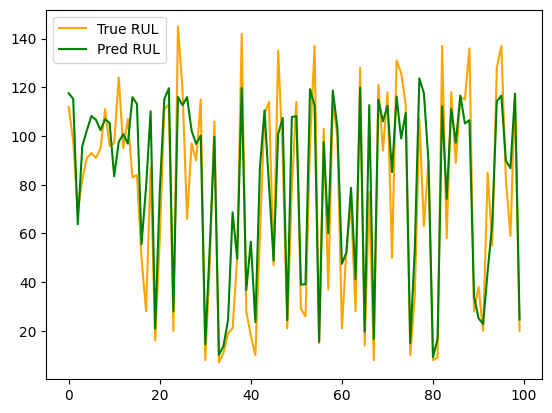

In [182]:

# Plot true and predicted RUL values
plt.plot(rul_verdadero, label = "True RUL", color = "orange")
plt.plot(promedio_predicciones_por_motor, label = "Pred RUL", color = "green")
plt.legend()
plt.show()

# 1D-CNN

In [214]:

datos_entrenamiento = pd.read_csv("train_FD001.txt", sep="\s+", header=None)
datos_prueba = pd.read_csv("test_FD001.txt", sep="\s+", header=None)
rul_verdadero = pd.read_csv('RUL_FD001.txt', sep='\s+', header=None)

longitud_ventana = 30
desplazamiento = 1
rul_inicial = 125            
datos_entrenamiento_procesados = []
objetivos_entrenamiento_procesados = []
num_ventanas_prueba = 5     
datos_prueba_procesados = []
lista_num_ventanas_prueba = []
columnas_a_eliminar = [0, 1, 2, 3, 4, 5, 9, 10, 14, 20, 22, 23]


primera_columna_entrenamiento = datos_entrenamiento[0]
primera_columna_prueba = datos_prueba[0]
escalador = MinMaxScaler(feature_range=(-1, 1))
datos_entrenamiento = escalador.fit_transform(datos_entrenamiento.drop(columns=columnas_a_eliminar))
datos_prueba = escalador.transform(datos_prueba.drop(columns=columnas_a_eliminar))

datos_entrenamiento = pd.DataFrame(data=np.c_[primera_columna_entrenamiento, datos_entrenamiento])
datos_prueba = pd.DataFrame(data=np.c_[primera_columna_prueba, datos_prueba])

num_maquinas_entrenamiento = len(datos_entrenamiento[0].unique())
num_maquinas_prueba = len(datos_prueba[0].unique())
for i in np.arange(1, num_maquinas_entrenamiento + 1):
    temp_datos_entrenamiento = datos_entrenamiento[datos_entrenamiento[0] == i].drop(columns=[0]).values
    if (len(temp_datos_entrenamiento) < longitud_ventana):
        print(f"El motor de entrenamiento {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
        
    temp_objetivos_entrenamiento = procesar_objetivos(longitud_datos=temp_datos_entrenamiento.shape[0], rul_inicial=rul_inicial)
    datos_para_una_maquina, objetivos_para_una_maquina = procesar_datos_de_entrada_con_objetivos(temp_datos_entrenamiento, temp_objetivos_entrenamiento, 
                                                                                longitud_ventana=longitud_ventana, desplazamiento=desplazamiento)
    datos_entrenamiento_procesados.append(datos_para_una_maquina)
    objetivos_entrenamiento_procesados.append(objetivos_para_una_maquina)

datos_entrenamiento_procesados = np.concatenate(datos_entrenamiento_procesados)
objetivos_entrenamiento_procesados = np.concatenate(objetivos_entrenamiento_procesados)


for i in np.arange(1, num_maquinas_prueba + 1):
    temp_datos_prueba = datos_prueba[datos_prueba[0] == i].drop(columns=[0]).values
    
    if (len(temp_datos_prueba) < longitud_ventana):
        print(f"El motor de prueba {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
    
    #prueba
    datos_prueba_para_una_maquina, num_ventanas = procesar_datos_de_prueba(temp_datos_prueba, longitud_ventana=longitud_ventana, desplazamiento=desplazamiento,
                                                             num_ventanas_prueba=num_ventanas_prueba)
    
    datos_prueba_procesados.append(datos_prueba_para_una_maquina)
    lista_num_ventanas_prueba.append(num_ventanas)

datos_prueba_procesados = np.concatenate(datos_prueba_procesados)
rul_verdadero = rul_verdadero[0].values

#entrenamiento
indice = np.random.permutation(len(objetivos_entrenamiento_procesados))
datos_entrenamiento_procesados, objetivos_entrenamiento_procesados = datos_entrenamiento_procesados[indice], objetivos_entrenamiento_procesados[indice]

print("Forma de los datos de entrenamiento procesados: ", datos_entrenamiento_procesados.shape)
print("Forma de los objetivos de entrenamiento procesados: ", objetivos_entrenamiento_procesados.shape)
print("Forma de los datos de prueba procesados: ", datos_prueba_procesados.shape)
print("Forma de los RUL verdaderos: ", rul_verdadero.shape)


Forma de los datos de entrenamiento procesados:  (17731, 30, 14)
Forma de los objetivos de entrenamiento procesados:  (17731,)
Forma de los datos de prueba procesados:  (497, 30, 14)
Forma de los RUL verdaderos:  (100,)


In [215]:
datos_entrenamiento_procesados, datos_validacion_procesados, objetivos_entrenamiento_procesados, objetivos_validacion_procesados = train_test_split(
    datos_entrenamiento_procesados, objetivos_entrenamiento_procesados, test_size=0.15)

print("Forma de los datos de entrenamiento procesados: ", datos_entrenamiento_procesados.shape)
print("Forma de los objetivos de entrenamiento procesados: ", objetivos_entrenamiento_procesados.shape)
print("Forma de los datos de validación procesados: ", datos_validacion_procesados.shape)
print("Forma de los objetivos de validación procesados: ", objetivos_validacion_procesados.shape)


Forma de los datos de entrenamiento procesados:  (15071, 30, 14)
Forma de los objetivos de entrenamiento procesados:  (15071,)
Forma de los datos de validación procesados:  (2660, 30, 14)
Forma de los objetivos de validación procesados:  (2660,)


In [81]:

def crear_modelo_compilado():
    modelo = tf.keras.Sequential([
        tf.keras.layers.Conv1D(256, 7, activation='relu', input_shape=(longitud_ventana, datos_entrenamiento_procesados.shape[2])),
        tf.keras.layers.Conv1D(96, 7, activation='relu'),
        tf.keras.layers.Conv1D(32, 7, activation='relu'),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    modelo.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae'])
    return modelo

modelo = crear_modelo_compilado()
historia = modelo.fit(
    datos_entrenamiento_procesados, objetivos_entrenamiento_procesados, 
    epochs=20,
    validation_data=(datos_validacion_procesados, objetivos_validacion_procesados),
    batch_size=64, 
    verbose=2
)


Epoch 1/20

171/171 - 5s - loss: 4012.8872 - mae: 48.9332 - val_loss: 618.8990 - val_mae: 20.1408 - 5s/epoch - 27ms/step
Epoch 2/20
171/171 - 3s - loss: 559.2966 - mae: 19.1364 - val_loss: 514.5499 - val_mae: 18.1557 - 3s/epoch - 15ms/step
Epoch 3/20
171/171 - 3s - loss: 484.4931 - mae: 17.7500 - val_loss: 472.9069 - val_mae: 17.6207 - 3s/epoch - 16ms/step
Epoch 4/20
171/171 - 3s - loss: 460.0186 - mae: 17.2687 - val_loss: 451.7645 - val_mae: 17.1401 - 3s/epoch - 15ms/step
Epoch 5/20
171/171 - 3s - loss: 445.5174 - mae: 16.9602 - val_loss: 452.2952 - val_mae: 17.4057 - 3s/epoch - 15ms/step
Epoch 6/20
171/171 - 3s - loss: 431.2289 - mae: 16.6357 - val_loss: 419.8393 - val_mae: 16.3528 - 3s/epoch - 16ms/step
Epoch 7/20
171/171 - 3s - loss: 413.2296 - mae: 16.2393 - val_loss: 399.5519 - val_mae: 15.9843 - 3s/epoch - 16ms/step
Epoch 8/20
171/171 - 3s - loss: 395.4388 - mae: 15.8032 - val_loss: 376.1685 - val_mae: 15.5120 - 3s/epoch - 16ms/step
Epoch 9/20
171/171 - 3s - loss: 371.1826 - mae

In [66]:

predicciones_rul = modelo.predict(datos_prueba_procesados).reshape(-1)

predicciones_por_motor = np.split(predicciones_rul, np.cumsum(lista_num_ventanas_prueba)[:-1])
promedio_predicciones_por_motor = [np.average(preds_por_motor, weights=np.repeat(1/num_ventanas, num_ventanas)) 
                                   for preds_por_motor, num_ventanas in zip(predicciones_por_motor, lista_num_ventanas_prueba)]

RMSE = np.sqrt(mean_squared_error(rul_verdadero, promedio_predicciones_por_motor))
MAE_ajustado = mean_absolute_error(rul_verdadero, promedio_predicciones_por_motor)

print("RMSE final 1D-CNN: ", RMSE)
print("MAE 1D-CNN: ", MAE_ajustado)
print("S-score 1D-CNN: ", s_score)


16/16 [==============================] - 0s 6ms/step
RMSE final 1D-CNN:  15.676326982492997
MAE 1D-CNN:  12.18980825614929
S-score 1D-CNN:  367.5677426572352


In [63]:
s_score = compute_s_score(rul_verdadero, promedio_predicciones_por_motor)


S-score:  367.5677426572352


In [71]:
import visualkeras
from PIL import ImageFont


font = ImageFont.truetype("arial.ttf", 12)


visualkeras.layered_view(modelo, legend=True, font=font, to_file='modelo_1D_CNN_resized.png').show()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


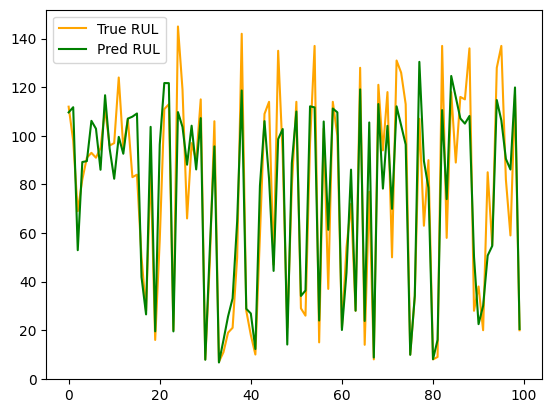

In [76]:
# Plot true and predicted RUL values
plt.plot(rul_verdadero, label = "True RUL", color = "orange")
plt.plot(promedio_predicciones_por_motor, label = "Pred RUL", color = "green")
plt.legend()
plt.show()

In [84]:
from bokeh.plotting import figure, show
from bokeh.layouts import gridplot
from bokeh.io import output_notebook

def plot_history(fit_history):
    output_notebook()  
    metrics = ['loss', 'mae']
    titles = ['Loss', 'MAE']
    plots = []

    for i, metric in enumerate(metrics):
        p = figure(title=titles[i], x_axis_label='Epochs', y_axis_label=metric)
        p.line(fit_history.epoch, fit_history.history[metric], line_color='green', legend_label='Train')
        if 'val_' + metric in fit_history.history:
            p.line(fit_history.epoch, fit_history.history['val_' + metric], line_color='orange', legend_label='Validation')
        plots.append(p)

    grid = gridplot([[plots[0], plots[1]]])
    show(grid)

plot_history(historia)


Loading BokehJS ...

# LSTM

In [217]:
#carga
datos_entrenamiento = pd.read_csv("train_FD001.txt", sep="\s+", header=None)
datos_prueba = pd.read_csv("test_FD001.txt", sep="\s+", header=None)
rul_verdadero = pd.read_csv("RUL_FD001.txt", sep='\s+', header=None)

longitud_ventana = 30
desplazamiento = 1
rul_inicial = 125            
datos_entrenamiento_procesados = []
objetivos_entrenamiento_procesados = []
num_ventanas_prueba = 5     
datos_prueba_procesados = []
lista_num_ventanas_prueba = []
columnas_a_eliminar = [0, 1, 2, 3, 4, 5, 9, 10, 14, 20, 22, 23]

primera_columna_entrenamiento = datos_entrenamiento[0]
primera_columna_prueba = datos_prueba[0]

escalador = StandardScaler()
datos_entrenamiento = escalador.fit_transform(datos_entrenamiento.drop(columns = columnas_a_eliminar))
datos_prueba = escalador.transform(datos_prueba.drop(columns = columnas_a_eliminar))

datos_entrenamiento = pd.DataFrame(data = np.c_[primera_columna_entrenamiento, datos_entrenamiento])
datos_prueba = pd.DataFrame(data = np.c_[primera_columna_prueba, datos_prueba])
num_maquinas_entrenamiento = len(datos_entrenamiento[0].unique())
num_maquinas_prueba = len(datos_prueba[0].unique())

for i in np.arange(1, num_maquinas_entrenamiento + 1):
    temp_datos_entrenamiento = datos_entrenamiento[datos_entrenamiento[0] == i].drop(columns = [0]).values
    
    if (len(temp_datos_entrenamiento) < longitud_ventana):
        print(f"El motor de entrenamiento {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
        
    temp_objetivos_entrenamiento = procesar_objetivos(longitud_datos=temp_datos_entrenamiento.shape[0], rul_inicial=rul_inicial)
    datos_para_una_maquina, objetivos_para_una_maquina = procesar_datos_de_entrada_con_objetivos(temp_datos_entrenamiento, temp_objetivos_entrenamiento, 
                                                                                longitud_ventana=longitud_ventana, desplazamiento=desplazamiento)
    
    datos_entrenamiento_procesados.append(datos_para_una_maquina)
    objetivos_entrenamiento_procesados.append(objetivos_para_una_maquina)

datos_entrenamiento_procesados = np.concatenate(datos_entrenamiento_procesados)
objetivos_entrenamiento_procesados = np.concatenate(objetivos_entrenamiento_procesados)

#prueba
for i in np.arange(1, num_maquinas_prueba + 1):
    temp_datos_prueba = datos_prueba[datos_prueba[0] == i].drop(columns = [0]).values
    
    if (len(temp_datos_prueba) < longitud_ventana):
        print(f"El motor de prueba {i} no tiene suficientes datos para una longitud de ventana de {longitud_ventana}")
        raise AssertionError("La longitud de la ventana es mayor que el número de puntos de datos para algunos motores. "
                             "Intenta disminuir la longitud de la ventana.")
    
    
    datos_prueba_para_una_maquina, num_ventanas = procesar_datos_de_prueba(temp_datos_prueba, longitud_ventana=longitud_ventana, desplazamiento=desplazamiento,
                                                             num_ventanas_prueba=num_ventanas_prueba)
    
    datos_prueba_procesados.append(datos_prueba_para_una_maquina)
    lista_num_ventanas_prueba.append(num_ventanas)

datos_prueba_procesados = np.concatenate(datos_prueba_procesados)
rul_verdadero = rul_verdadero[0].values

indice = np.random.permutation(len(objetivos_entrenamiento_procesados))
datos_entrenamiento_procesados, objetivos_entrenamiento_procesados = datos_entrenamiento_procesados[indice], objetivos_entrenamiento_procesados[indice]
print("Datos de entrenamiento procesados (LSTM): ", datos_entrenamiento_procesados.shape)
print("Datos de prueba procesados (LSTM): ", datos_prueba_procesados.shape)
print("Objetivos de entrenamiento procesados (LSTM): ", objetivos_entrenamiento_procesados.shape)
print("Forma de los RUL verdaderos: ", rul_verdadero.shape)


Datos de entrenamiento procesados (LSTM):  (17731, 30, 14)
Datos de prueba procesados (LSTM):  (497, 30, 14)
Objetivos de entrenamiento procesados (LSTM):  (17731,)
Forma de los RUL verdaderos:  (100,)


In [218]:

datos_entrenamiento_procesados, datos_validacion_procesados, objetivos_entrenamiento_procesados, objetivos_validacion_procesados = train_test_split(
    datos_entrenamiento_procesados, objetivos_entrenamiento_procesados, test_size=0.15)

print("Datos de entrenamiento procesados (LSTM): ", datos_entrenamiento_procesados.shape)
print("Objetivos de entrenamiento procesados (LSTM): ", objetivos_entrenamiento_procesados.shape)
print("Datos de validación procesados (LSTM): ", datos_validacion_procesados.shape)
print("Objetivos de validación procesados (LSTM): ", objetivos_validacion_procesados.shape)


Datos de entrenamiento procesados (LSTM):  (15071, 30, 14)
Objetivos de entrenamiento procesados (LSTM):  (15071,)
Datos de validación procesados (LSTM):  (2660, 30, 14)
Objetivos de validación procesados (LSTM):  (2660,)


In [99]:
#LSTM
def crear_modelo_compilado():
    modelo = tf.keras.Sequential([
        tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(longitud_ventana, datos_entrenamiento_procesados.shape[2])),
        tf.keras.layers.LSTM(64, return_sequences=False),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    modelo.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['mae'])
    return modelo

#entreno
modelo = crear_modelo_compilado()
historia = modelo.fit(
    datos_entrenamiento_procesados, objetivos_entrenamiento_procesados, 
    epochs=20,
    validation_data=(datos_validacion_procesados, objetivos_validacion_procesados),
    batch_size=64, 
    verbose=2
)


Epoch 1/20
236/236 - 14s - loss: 7090.5386 - mae: 74.0895 - val_loss: 5827.7144 - val_mae: 65.9736 - 14s/epoch - 59ms/step
Epoch 2/20
236/236 - 10s - loss: 5097.2026 - mae: 60.4448 - val_loss: 4297.5161 - val_mae: 54.7164 - 10s/epoch - 42ms/step
Epoch 3/20
236/236 - 11s - loss: 3680.2834 - mae: 49.8701 - val_loss: 3003.4302 - val_mae: 44.6041 - 11s/epoch - 45ms/step
Epoch 4/20
236/236 - 11s - loss: 2509.9175 - mae: 40.1753 - val_loss: 1976.7479 - val_mae: 35.1193 - 11s/epoch - 45ms/step
Epoch 5/20
236/236 - 11s - loss: 1602.0262 - mae: 31.2243 - val_loss: 1227.7334 - val_mae: 27.5269 - 11s/epoch - 46ms/step
Epoch 6/20
236/236 - 11s - loss: 983.6459 - mae: 24.4207 - val_loss: 733.2879 - val_mae: 21.0249 - 11s/epoch - 47ms/step
Epoch 7/20
236/236 - 11s - loss: 597.3524 - mae: 19.2911 - val_loss: 452.8993 - val_mae: 17.1100 - 11s/epoch - 46ms/step
Epoch 8/20
236/236 - 11s - loss: 382.4052 - mae: 15.7651 - val_loss: 306.7156 - val_mae: 14.3301 - 11s/epoch - 46ms/step
Epoch 9/20
236/236 - 1

In [102]:
s_score = compute_s_score(rul_verdadero, promedio_predicciones_por_motor)


In [104]:

predicciones_rul = modelo.predict(datos_prueba_procesados).reshape(-1)
predicciones_por_motor = np.split(predicciones_rul, np.cumsum(lista_num_ventanas_prueba)[:-1])

promedio_predicciones_por_motor = [np.average(preds_por_motor, weights=np.repeat(1/num_ventanas, num_ventanas)) 
                                   for preds_por_motor, num_ventanas in zip(predicciones_por_motor, lista_num_ventanas_prueba)]

RMSE = np.sqrt(mean_squared_error(rul_verdadero, promedio_predicciones_por_motor))
MAE_ajustado = mean_absolute_error(rul_verdadero, promedio_predicciones_por_motor)

print("RMSE final LSTM: ", RMSE)
print("MAE LSTM: ", MAE_ajustado)
print("S-score LSTM: ", s_score)



16/16 [==============================] - 2s 127ms/step
RMSE final LSTM:  15.177253439766323
MAE LSTM:  11.939148672103883
S-score LSTM:  436.438872862131


In [105]:
import visualkeras
from PIL import ImageFont

font = ImageFont.truetype("arial.ttf", 12)  
visualkeras.layered_view(modelo, legend=True, font=font, to_file='modelo_1D_CNN_resized.png').show()

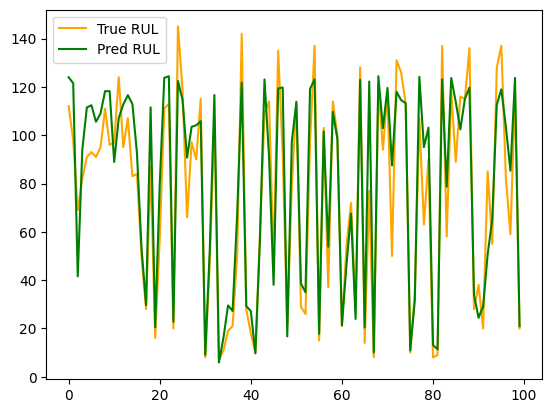

In [106]:
# Plot true and predicted RUL values
plt.plot(rul_verdadero, label = "True RUL", color = "orange")
plt.plot(promedio_predicciones_por_motor, label = "Pred RUL", color = "green")
plt.legend()
plt.show()

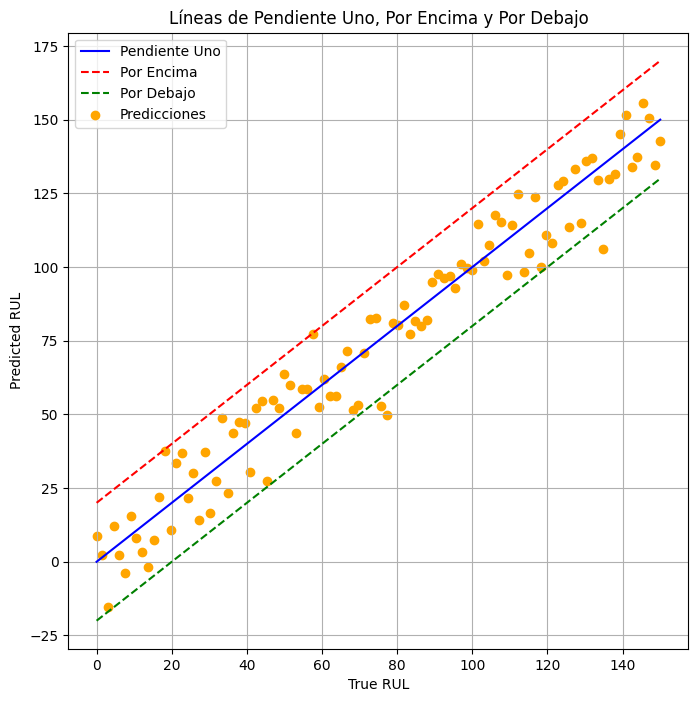

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo
true_rul = np.linspace(0, 150, 100)
pred_rul = true_rul + np.random.normal(0, 10, size=true_rul.shape)

# Crear figura y ejes
plt.figure(figsize=(8, 8))

# Plotear la línea de pendiente uno
plt.plot(true_rul, true_rul, color='blue', label='Pendiente Uno')

# Plotear la línea por encima (añadiendo un margen)
plt.plot(true_rul, true_rul + 20, color='red', linestyle='--', label='Por Encima')

# Plotear la línea por debajo (restando un margen)
plt.plot(true_rul, true_rul - 20, color='green', linestyle='--', label='Por Debajo')

# Plotear los puntos de datos
plt.scatter(true_rul, pred_rul, color='orange', label='Predicciones')

# Añadir etiquetas y leyenda
plt.xlabel('True RUL')
plt.ylabel('Predicted RUL')
plt.title('Líneas de Pendiente Uno, Por Encima y Por Debajo')
plt.legend()

# Mostrar gráfica
plt.grid(True)
plt.show()
